In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:

from google.colab import files
uploaded = files.upload()

Saving movies_metadata.csv to movies_metadata.csv


In [6]:
import pandas as pd
# Get the uploaded file
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
df.head()

/tmp/ipython-input-502159737.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
df = df[["overview", "revenue"]]

In [8]:
df = df.dropna()

In [9]:
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df = df.dropna()

In [10]:
# Create binary label: 1 if revenue > 0, else 0
df['label'] = 0
df.loc[df['revenue'] > 0, 'label'] = 1

In [12]:
cleaned_text = []

for text in df["overview"]:
    text = text.lower()
    text = re.sub(r"[^a-zA-Z ]", "", text)
    cleaned_text.append(text)

df["overview"] = cleaned_text

In [13]:
X = df["overview"]
y = df["label"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [44]:
lr = LinearRegression()
lr.fit(X_train_tfidf, y_train)

# STEP 11: Predict continuous revenue
y_pred = lr.predict(X_test_tfidf)

# STEP 12: Regression evaluation
print("---- Linear Regression Metrics ----")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

# STEP 13: Threshold-based classification
threshold = y_train.median()

y_test_class = (y_test >= threshold).astype(int)
y_pred_class = (y_pred >= threshold).astype(int)

# STEP 14: Classification evaluation
print("\n---- Threshold-based Classification Metrics ----")
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Precision:", precision_score(y_test_class, y_pred_class))
print("Recall:", recall_score(y_test_class, y_pred_class))
print("F1 Score:", f1_score(y_test_class, y_pred_class))

---- Linear Regression Metrics ----
MAE: 0.2797721312777875
MSE: 0.14540470367435046
RMSE: 0.38131968697452595
R2 Score: -0.06167049286846327

---- Threshold-based Classification Metrics ----
Accuracy: 0.8347562345540328
Precision: 1.0
Recall: 0.8347562345540328
F1 Score: 0.9099369374885202


In [18]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Linear Regression:", accuracy_lr)

Linear Regression: 0.8357672433161087


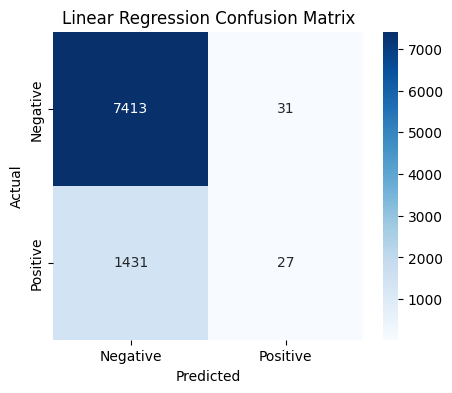

In [28]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Linear Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

print("RANDOM FOREST")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST
Accuracy: 0.8361042462368007
Precision: 0.4
Recall: 0.0013717421124828531
F1 Score: 0.002734107997265892
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7444
           1       0.40      0.00      0.00      1458

    accuracy                           0.84      8902
   macro avg       0.62      0.50      0.46      8902
weighted avg       0.76      0.84      0.76      8902



In [27]:
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest:", accuracy_rf)

Random Forest: 0.8357672433161087


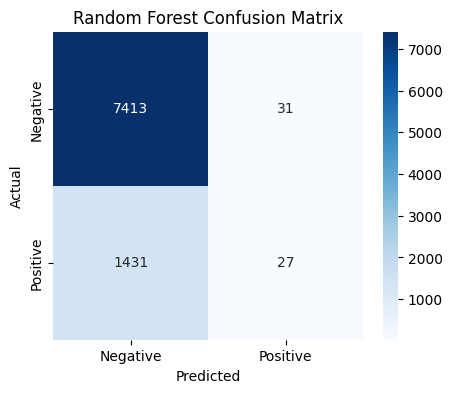

In [29]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)

print("XGBOOST")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("XGBOOST Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:02:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOOST
Accuracy: 0.8362165805436981
Precision: 0.5
Recall: 0.009602194787379973
F1 Score: 0.018842530282637954
XGBOOST Classification Report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7444
           1       0.50      0.01      0.02      1458

    accuracy                           0.84      8902
   macro avg       0.67      0.50      0.46      8902
weighted avg       0.78      0.84      0.76      8902



In [45]:
from sklearn.metrics import accuracy_score

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBOOST:", accuracy_xgb)

XGBOOST: 0.8362165805436981


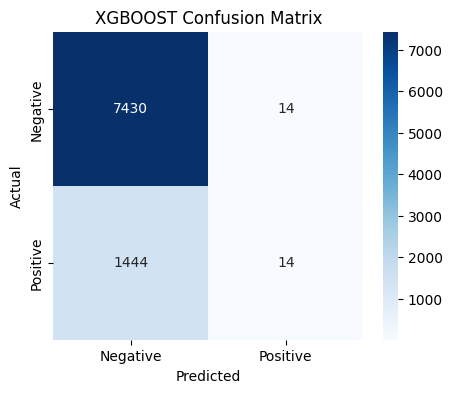

In [46]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("XGBOOST Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()